In [95]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [96]:

BASE = "../data/elliptic_bitcoin_dataset"

features = pd.read_csv(f"{BASE}/elliptic_txs_features.csv", header=None)
edges = pd.read_csv(f"{BASE}/elliptic_txs_edgelist.csv")
labels = pd.read_csv(f"{BASE}/elliptic_txs_classes.csv")

print(features.shape, edges.shape, labels.shape)


(203769, 167) (234355, 2) (203769, 2)


In [97]:
# Elliptic schema: col0=txId, col1=time_step, rest=features
features = features.copy()
features = features.rename(columns={0: "txId", 1: "time_step"})

# rename the rest as engineered features
for c in features.columns:
    if isinstance(c, int) and c >= 2:
        features = features.rename(columns={c: f"f_{c-2}"})


In [98]:
labels = labels.copy()
labels["class"] = labels["class"].astype(str)

label_map = {"1": "illicit", "2": "licit"}
labels["class_name"] = labels["class"].map(label_map).fillna("unknown")
labels["class_name"].value_counts()


class_name
unknown    157205
licit       42019
illicit      4545
Name: count, dtype: int64

In [99]:
df = features.merge(labels[["txId", "class_name"]], on="txId", how="left")
df["class_name"] = df["class_name"].fillna("unknown")
df.head()

,txId,time_step,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,class_name
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,licit
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


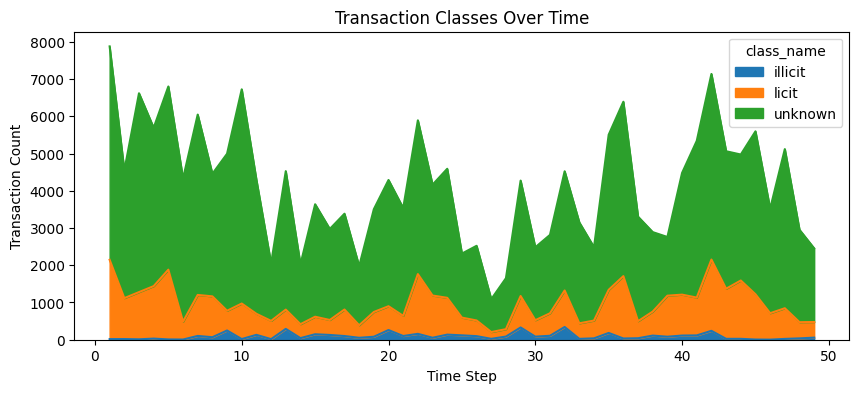

In [100]:
df_plot = df.reset_index(drop=True)

ct = pd.crosstab(df_plot["time_step"], df_plot["class_name"]).sort_index()

ct.plot(kind="area", stacked=True, figsize=(10,4))
plt.title("Transaction Classes Over Time")
plt.xlabel("Time Step")
plt.ylabel("Transaction Count")
plt.show()



In [101]:
features.head()

,txId,time_step,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,...,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


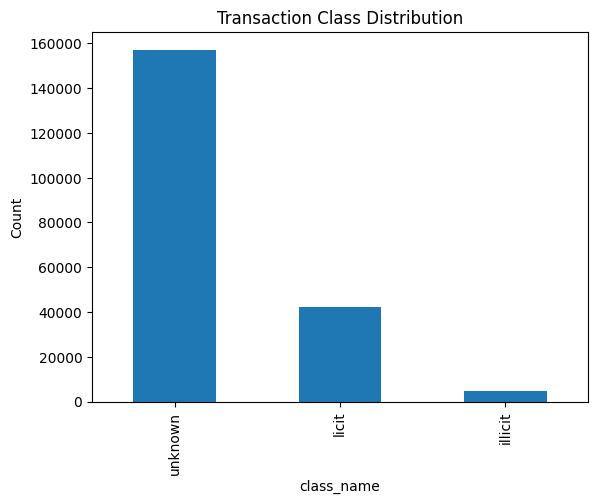

In [102]:
labels["class_name"].value_counts().plot(kind="bar")
plt.title("Transaction Class Distribution")
plt.ylabel("Count")
plt.show()


In [103]:
features.columns = [f"f_{i}" for i in range(features.shape[1])]
features.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_157', 'f_158', 'f_159', 'f_160', 'f_161', 'f_162', 'f_163', 'f_164',
       'f_165', 'f_166'],
      dtype='str', length=167)

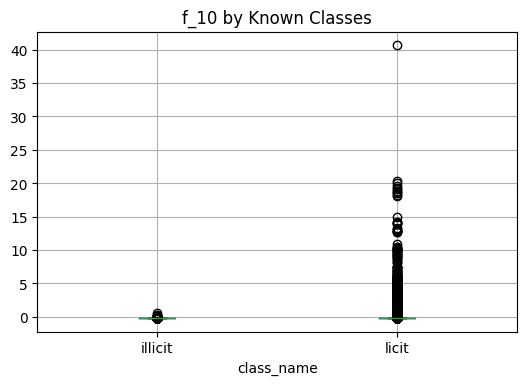

In [105]:
feature = "f_10"  # example, you’ll confirm meaning later

df_known = df[df["class_name"].isin(["illicit", "licit"])]

df_known.boxplot(column=feature, by="class_name", figsize=(6,4))
plt.title(f"{feature} by Known Classes")
plt.suptitle("")
plt.show()


In [109]:
edges.head()
edges.shape


(234355, 2)

In [110]:
edges['txId1'].value_counts().describe()


count    166345.000000
mean          1.408849
std           2.008279
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         472.000000
Name: count, dtype: float64

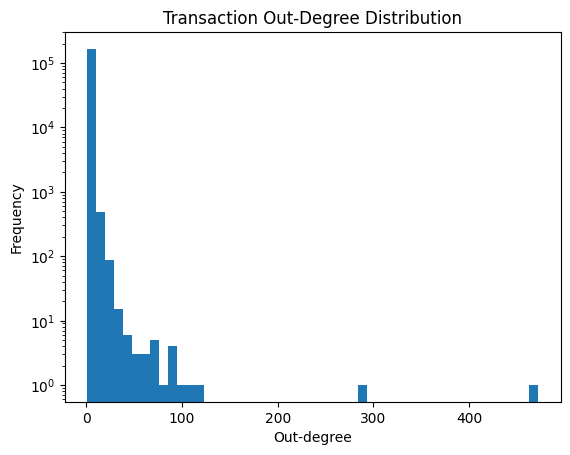

In [111]:
edges['txId1'].value_counts().plot(kind='hist', bins=50)
plt.title("Transaction Out-Degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()
